# Goals

   
### Questions
- what should be the percentage of the flare area on the solar disk to overcome the threshold of detection (most easy goal)
- How can we mesearue the flare spectrum to be present (integrating it weighted over the line/ fliters)
- what behaviours of the flare can be detected from the spacially integrated spectrum
- Making investigations of several types (ribbon/flare/...) time evolution of spectrum
- does sunspots have anything to do with them.
- ...


# formaat maken met H alpha

In [28]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

import sys
# sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un
print('sys.path:', sys.path)

sys.path: ['e:\\solar flares\\data\\2017-09-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin']


(1038, 1079) (1038, 1079)
Boundary
Blue=Outside, yellow=Inside


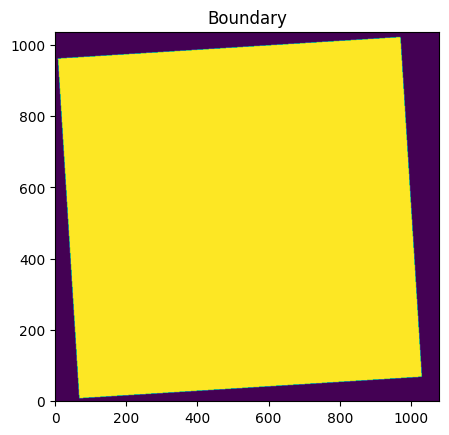

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')
COCOPLOT at  t=12:13:17 UT (frame number 70 )


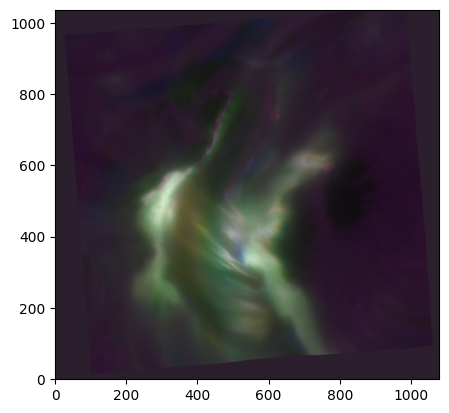

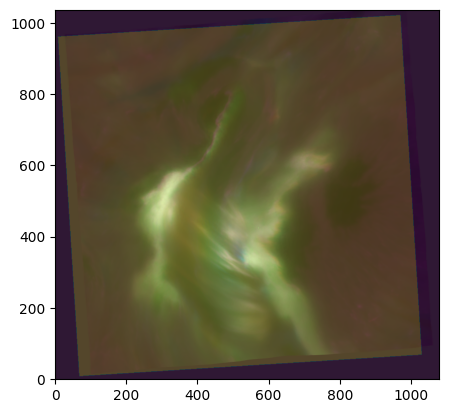

(1038, 1079, 3) (1038, 1079) 
HOW DOES THOSE DO NOT OVERLAP????


In [29]:
reload(un)
Ha = un.SST_data('nb_6563_2017-09-06T11_55_47_scans=3-215_im.fits',
                   'spectfile6563_93.idlsave','times6563_93_2017_09_06_11_55_47.idlsave', name_of_line='Ha17', thresh=[1e-15,2e-5])
Ha.update_filters([[10,1.25], [6,1], [2,1.25]])
Ha.ccp_frame(70)

Ha.ccp_frame(70,Show=False)
plt.imshow(Ha.current_ccp, origin='lower')

plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
plt.show()
print(np.shape(Ha.current_ccp),np.shape(Ha.boundary[::-1,:]), "\nHOW DOES THOSE DO NOT OVERLAP????")

In [30]:
Ha._time[1], Ha._time[0], Ha._time[2], Ha._time[-1], Ha._wavel, str(Ha._time[0]).split('.')[0][2:]#(str(Ha._time[0]).split('.')[0]).split["'"]

(b'11:56:05.170194',
 b'11:55:50.208205',
 b'11:56:20.132212',
 b'12:51:57.858824',
 array([6561.49999988, 6562.        , 6562.19999999, 6562.39999998,
        6562.69999999, 6562.84999999, 6563.        , 6563.15000001,
        6563.30000001, 6563.60000002, 6563.80000001, 6564.        ,
        6564.50000012], dtype='>f8'),
 '11:55:50')

In [31]:
Ha.calculate__FOV_spect_over_time()

In [32]:
65.170194-50.208205, (95.121560 - 50.0208) /3

(14.961988999999996, 15.033586666666666)

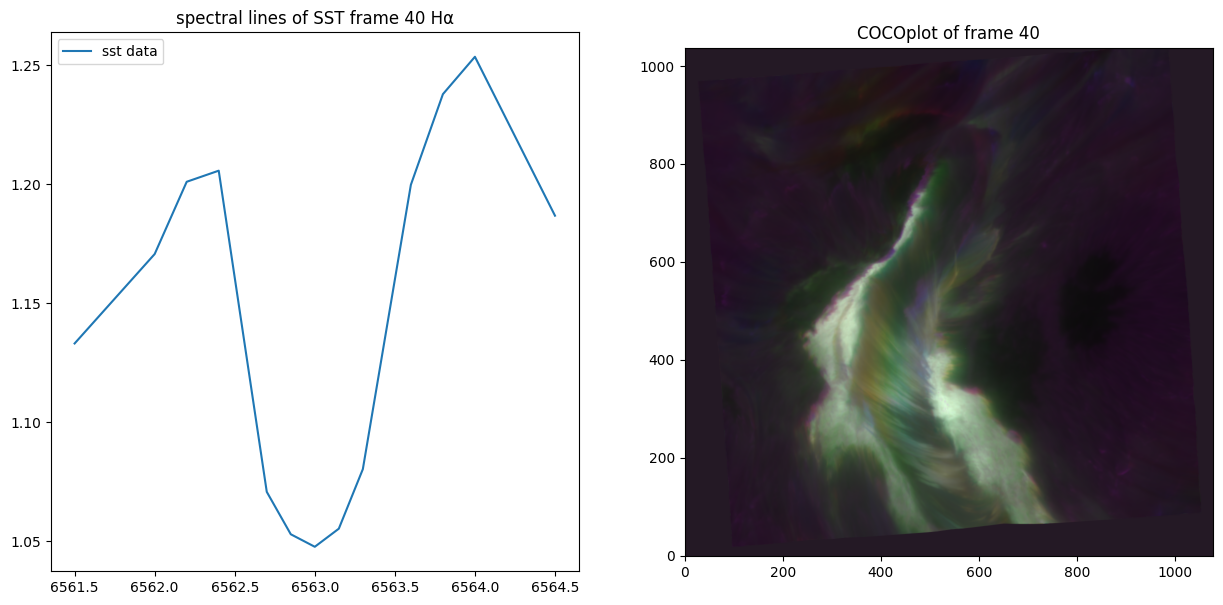

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

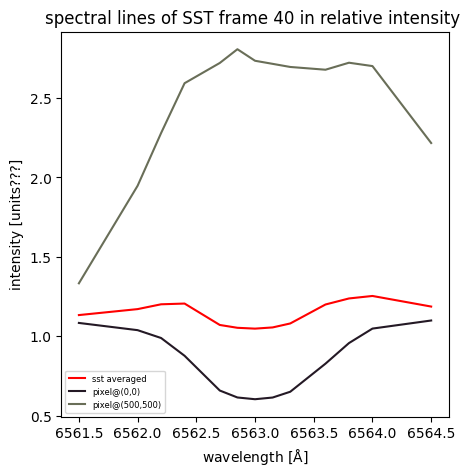

In [34]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

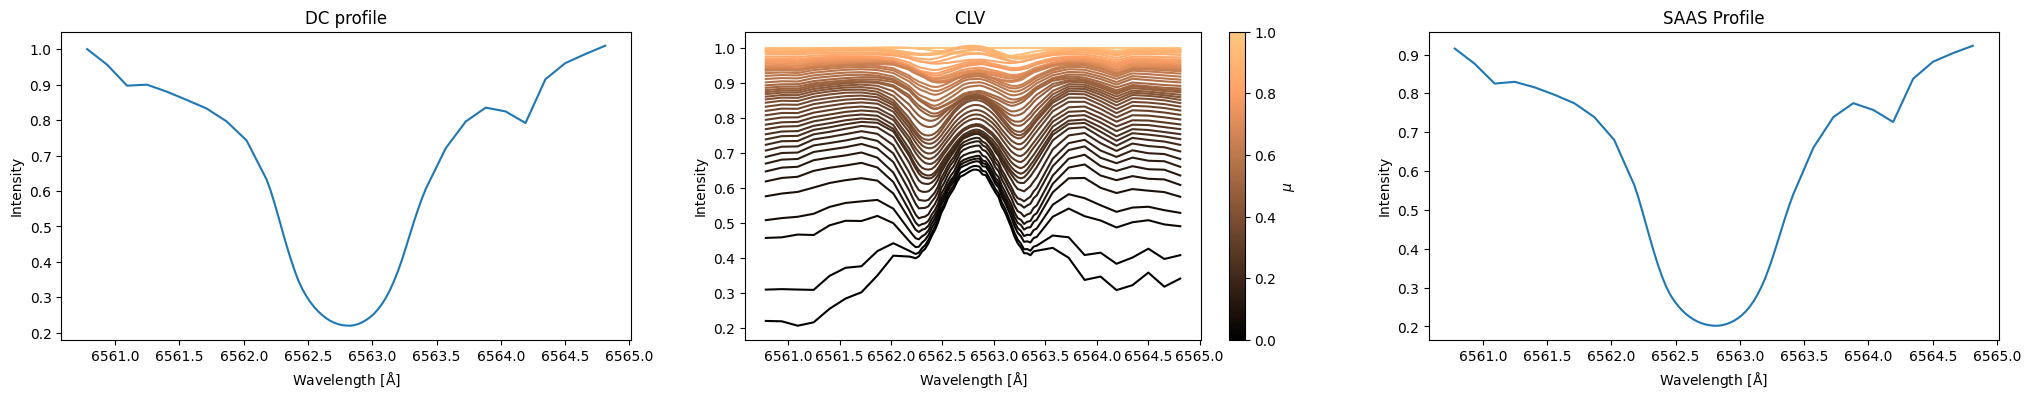

6562.797056366136 6562.797056366135


In [35]:
import use_nessi3 as un3
theor_Ha = un3.linestudier('6563_clv.fits', nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

# Finding $\mu$

# Dit klopt niet als dit de data is van de ochtend!!!!!!!!!!!!!!!!!


In [36]:
x,y = (513, -216)
radius = 959.63
mu  = (1-(x**2 + y**2)/radius**2)**0.5
mu

0.8145913512111488

The frame is centered at (520.837576386034, -213.21240933060704)


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


[482.771976386034, 558.903176386034, -248.70280933060704, -177.72200933060705]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.810305574689088 for timeframe 0
The frame is centered at (542.2961460260799, -208.40256506899792)
[504.2305460260799, 580.3617460260799, -243.8929650689979, -172.91216506899792]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7962880692583364 for timeframe 200
We take average mu to be  0.8032968438870519


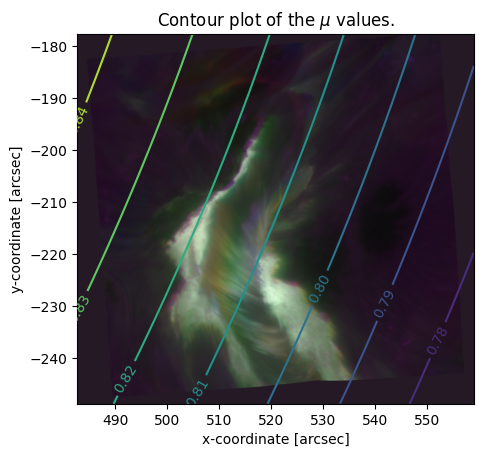

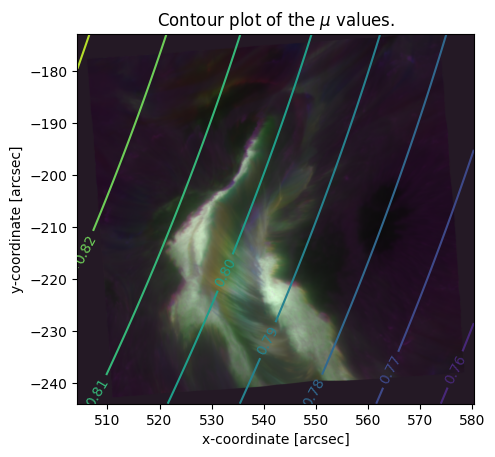

In [37]:
reload(un)
un.give_mu_contourplot('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=Ha)
un.give_mu_contourplot('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=Ha, timeFrame=200)
mu = (0.8103055960914449 + 0.7962880916826589) / 2
print('We take average mu to be ', mu)

In [38]:
xy = un.get_coord_creator('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits')
print(np.shape(Ha.datacube))
xy(1038//2, 1079 //2)

(213, 1, 13, 1038, 1079)


[513.4729031925608, -216.82059999727372]

In [39]:
position = (323.4, -287.9)
mu = (1-(323.4**2+287.9**2)/959.6**2)**0.5
mu

0.892416998354795

In [40]:
shift = (-520.837576386034+537, +213.21240933060704 -222)

The frame is centered at (520.837576386034, -213.21240933060704)
[498.9344, 575.0656, -257.4904, -186.5096]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7961787230136528 for timeframe 0
succesfully saved.
The frame is centered at (542.2961460260799, -208.40256506899792)
[520.3929696400459, 596.5241696400459, -252.68055573839086, -181.69975573839088]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7814833773052031 for timeframe 200
We take average mu to be  0.788831050159428
Mu also set to the theoretic nessi line.


0.788831050159428

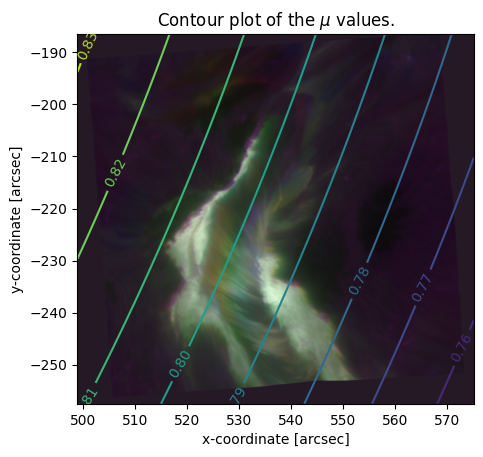

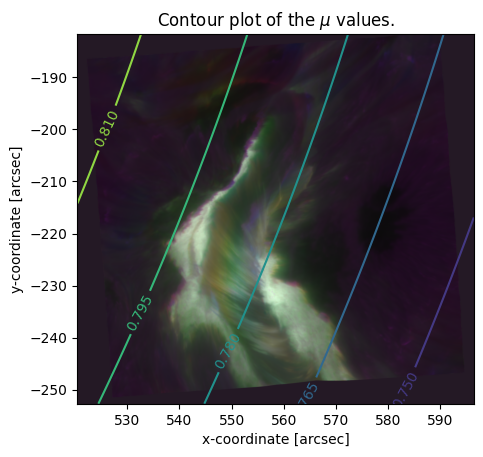

In [41]:
Ha.set_mu(theor_line=theor_Ha, number_of_last_frame=200, 
          alternative_filename='fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', shift=shift)


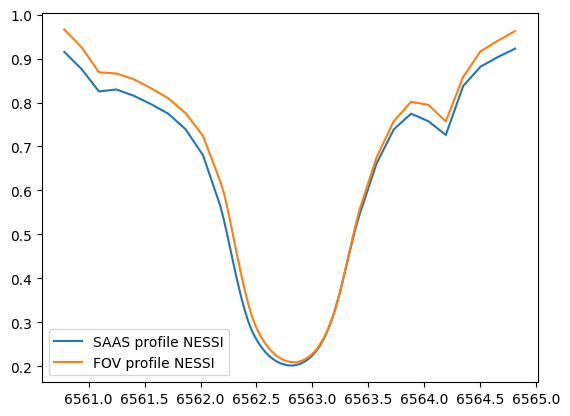

In [42]:
sst_data = Ha
theor_Ha.set_fov( sst_data.xx, sst_data.yy, Ha.boundary, sr=959.63)

## Finding a suitable quiet sun patch

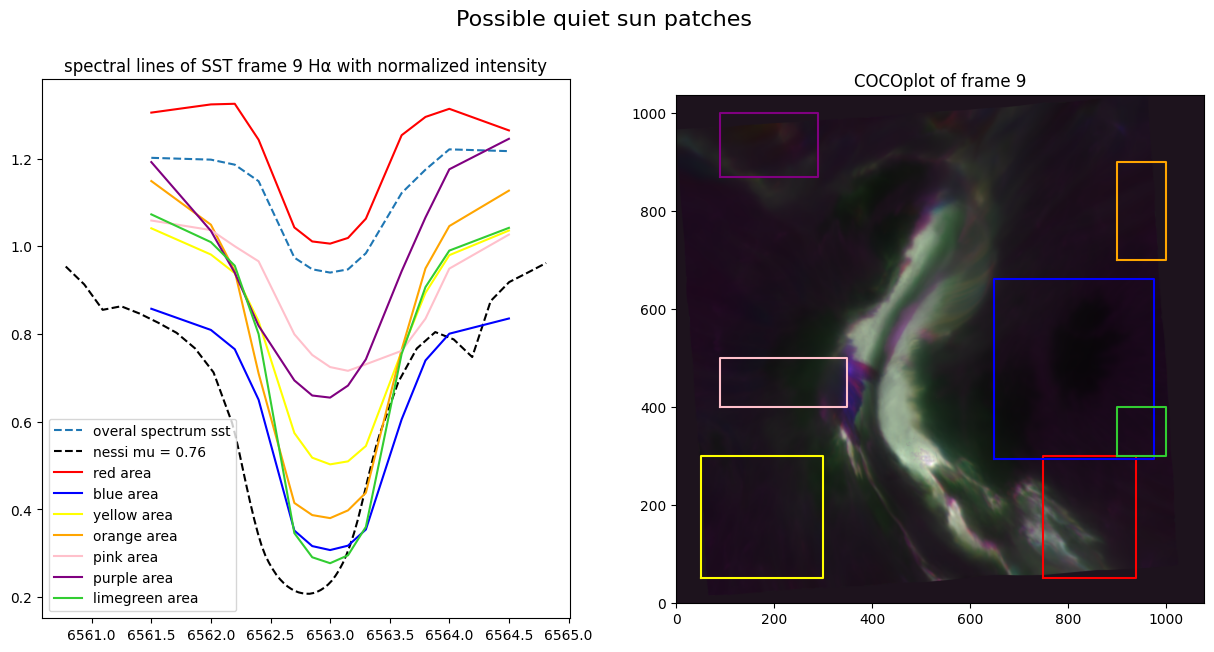

In [43]:
frame=9

X = [[(750,940), (50,300)], [(650,975), (294,662)],[(50,300), (50,300)], [(900, 1000), (700, 900)], [(90,350), (400,500)] , [(90,290), (870,1000)], [(900,1000), (300,400)] ]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

Ha.possible_quiet_sun_patches(frame, theor_Ha , X=X)

### The patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [44]:
color_wanted_patch = 'limegreen'

the edges of the patch are denoted by the xlim: (900, 1000) and ylim: (300, 400)


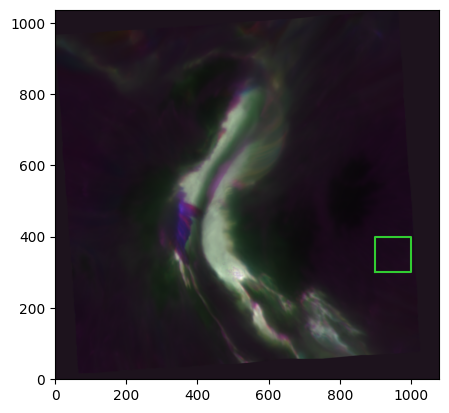

The quiet sun is pick at x (587.449161105723, -228.75790424369458) with average              mu 0.7539441843638167


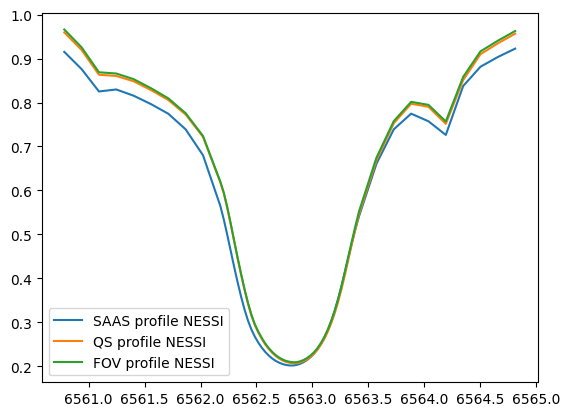

{'frame': 9, 'xlim': (900, 1000), 'ylim': (300, 400), 'color': 'limegreen'}

In [45]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012] [1.07269651 1.00938049 0.95570881 0.7997161  0.34561898 0.2906017
 0.27705133 0.29509542 0.35986298 0.7544895  0.90687823 0.99009037
 1.04195172] [0.83567577 0.72905493 0.59987419 0.36713467 0.21820512 0.20698592
 0.22555387 0.28660019 0.41933984 0.68387705 0.77373404 0.79196598
 0.90920671]
[0.20294363 1.44646692]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 8759867844.651472
        x: [ 1.812e-01  1.311e+00]
      nit: 9
      jac: [ 5.632e+04  2.048e+03]
 hess_inv: [[ 1.086e-13 -3.132e-14]
            [-3.132e-14  2.386e-13]]
     nfev: 124
     njev: 38


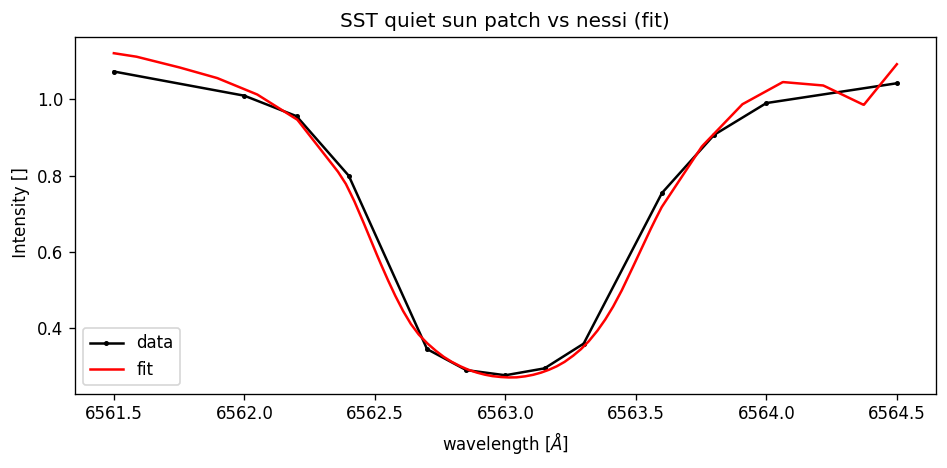

de p-waarde is  0.0 
Chi^2 reduced= 796351622.241043 
aantal vrijheidgraden= 11 
chi^2= 8759867844.651472
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


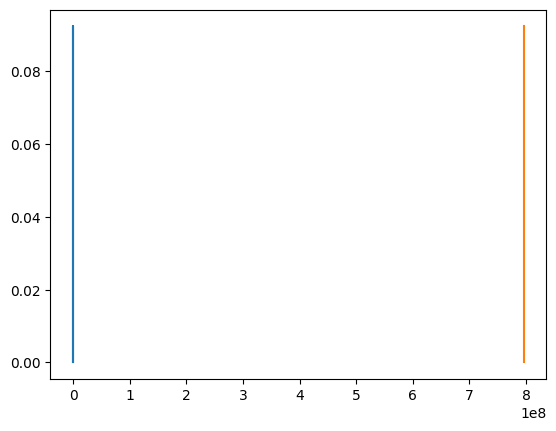

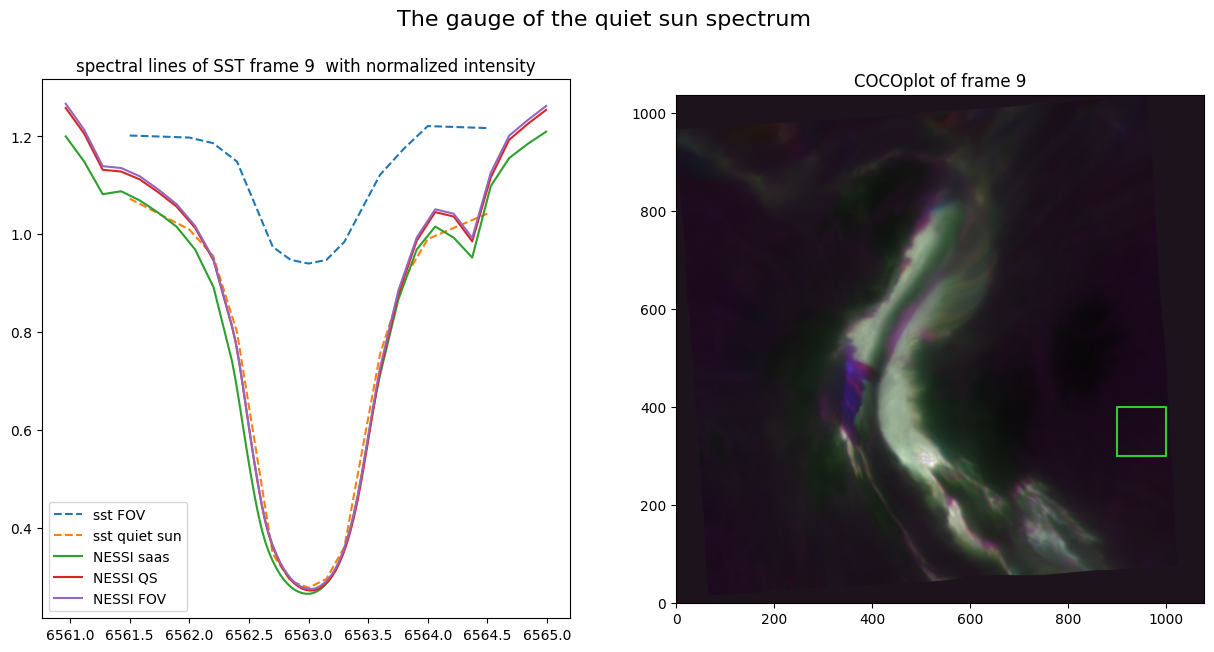

In [46]:
reload(un3)
un3.fit_qs_to_NESSI(theor_Ha, Ha)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [48]:
un.get_TIME(Ha)

array([ 0.        ,  0.25      ,  0.5       ,  0.75      ,  1.        ,
        1.25      ,  1.5       ,  1.75      ,  1.98333333,  2.23333333,
        2.48333333,  2.73333333,  2.98333333,  3.23333333,  3.48333333,
        3.73333333,  3.98333333,  4.23333333,  4.48333333,  4.73333333,
        4.98333333,  5.23333333,  5.48333333,  5.73333333,  5.98333333,
        6.23333333,  6.48333333,  6.73333333,  6.98333333,  7.23333333,
        7.48333333,  7.73333333,  7.98333333,  8.23333333,  8.48333333,
        8.73333333,  8.98333333,  9.23333333,  9.48333333,  9.71666667,
        9.96666667, 10.21666667, 10.46666667, 10.71666667, 10.96666667,
       11.21666667, 11.46666667, 11.71666667, 11.96666667, 12.21666667,
       12.46666667, 12.71666667, 12.96666667, 13.21666667, 13.46666667,
       13.71666667, 13.96666667, 14.21666667, 14.46666667, 14.71666667,
       14.96666667, 15.21666667, 15.46666667, 15.71666667, 15.96666667,
       16.21666667, 16.46666667, 16.71666667, 16.96666667, 17.2 

In [49]:
Ha.TIME = Ha.TIME[3:216] 

The peak occurs at frame [21] at time t=[b'12:01:04 UT.
The areafactor for THis flare is 0.001535062422363675 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 123.36%.


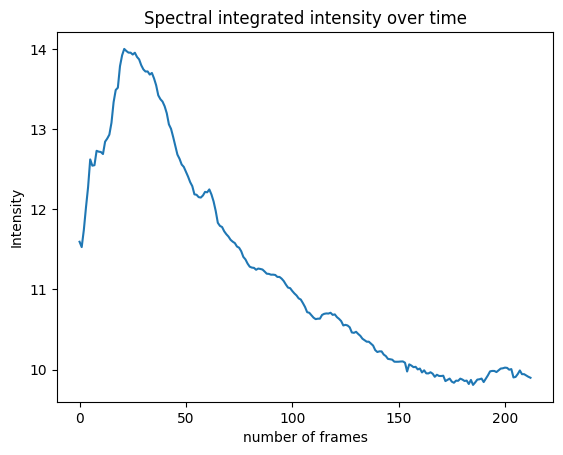

In [50]:
un.save_for_further_analysis(Ha, theor_Ha)


In [ ]:
data = un.load_for_further_analysis(['Ha17'])
data

{'FOV_Ha17': array([[1.        , 0.98911603, 0.98488782, ..., 0.97215287, 1.01730338,
         1.01247768],
        [1.00079728, 0.98951819, 0.97528021, ..., 0.97209999, 1.02315931,
         1.02233244],
        [1.01012666, 1.00347793, 0.98701515, ..., 0.98622749, 1.03341276,
         1.02998458],
        ...,
        [0.83856666, 0.81269827, 0.80899723, ..., 0.79600573, 0.81387384,
         0.82689741],
        [0.83895229, 0.81215772, 0.80985333, ..., 0.7933725 , 0.81445323,
         0.82892991],
        [0.83720461, 0.81341532, 0.80794449, ..., 0.79077479, 0.81274267,
         0.82950917]]),
 'quiet_sun_Ha17': array([[6.56131879e+03, 6.56181879e+03, 6.56201879e+03, 6.56221879e+03,
         6.56251879e+03, 6.56266879e+03, 6.56281879e+03, 6.56296879e+03,
         6.56311879e+03, 6.56341879e+03, 6.56361879e+03, 6.56381879e+03,
         6.56431879e+03],
        [8.18242360e-01, 7.69945519e-01, 7.29005290e-01, 6.10015586e-01,
         2.63634766e-01, 2.21668118e-01, 2.11332035e-01, 2.25

In [ ]:
import numpy as np
import use_nessi as un

filename = un.get_file_path_line_data("TIME_CaII17")
TIME = np.load(filename)
print(np.shape(TIME))
if np.shape(TIME)[0] > 213:
    print("We change it")
    TIME = TIME[3:216]
    np.save(filename, TIME)


(213,)


# Movie Making

frame: 0, 08:34:05.827440, total number of frames: 453 


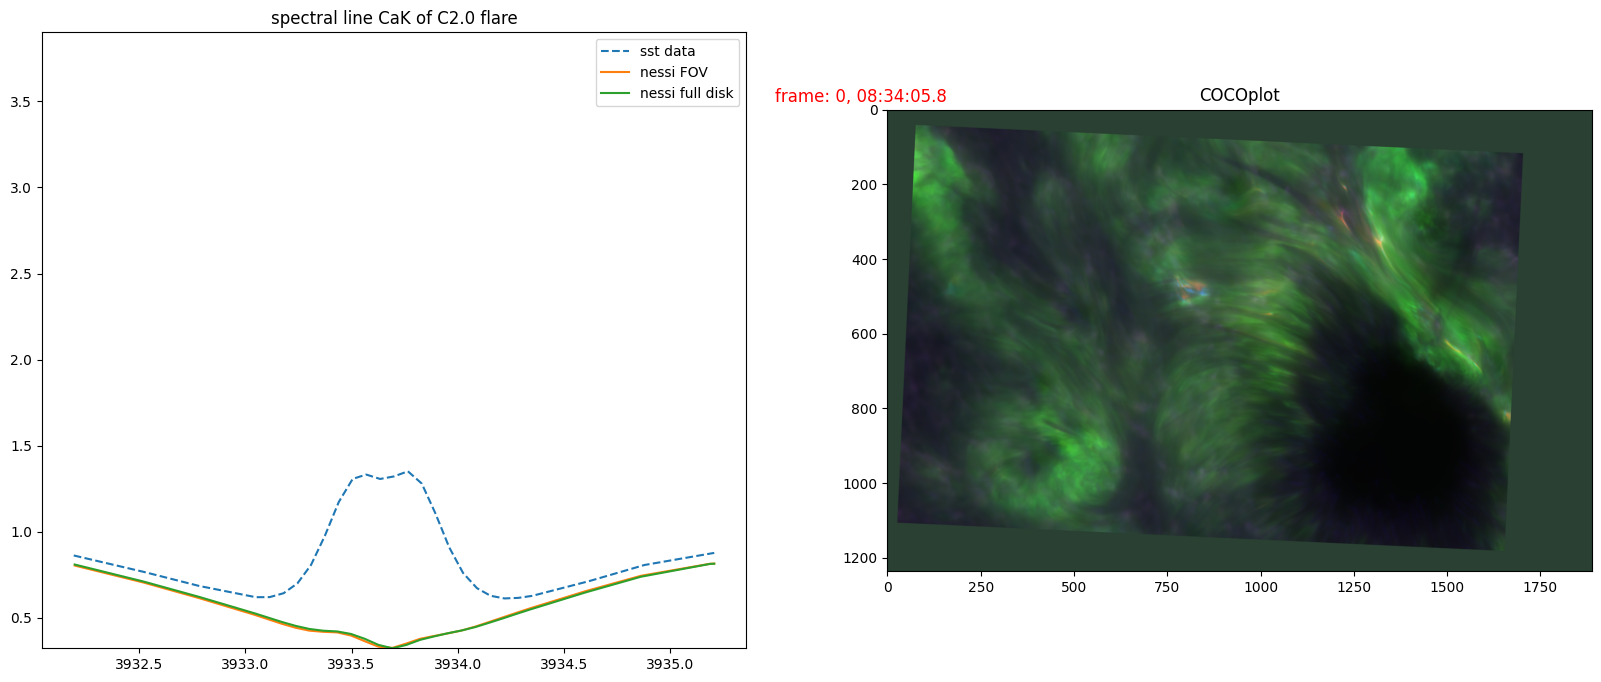

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 

In [ ]:
# fill in here all arguments
theor_line = theor_Ha
sst_data = Ha
name_of_flare = "X9.3"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)